<b><font size="6">Problem Statement:</font></b>

<b><font size="5">Matchup:ABD vs Bumrah</font></b>
    

<b><font size="4">Imports and load dataset</font></b>

In [1]:
import warnings
#filterwarnings(action)
#ignore-ignore all, regardless of comparing 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

<b><font size="4">Sneak peak into the data</font></b>

In [2]:
#ipl ball by ball data
df=pd.read_csv('IPL_ball_by_ball_updated.csv')

In [3]:
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [5]:
#3,4 super over data, 5,6 double super over data

In [6]:
df=df[(df.innings==1) | (df.innings==2)]

In [7]:
df.innings.unique()

array([2, 1], dtype=int64)

In [8]:
#what are the numbers when AB faced Bumrah
#step 1- filter by player names
#step2-use these names and assign it to striker, bowler
#step 3- get the reqd columns 

In [9]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [10]:
df[df.batting_team=='Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [11]:
#player 1 JJ Bumrah

In [12]:
#player 2 AB de Villiers

<b><font size="4">Dataset where bowler is Bumrah and striker is ABD</font></b>

In [13]:
req_df=df[ (df.striker=='AB de Villiers') & (df.bowler=='JJ Bumrah')]

In [14]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#calculate the fields that are reqd
#Number of runs scored
#Number of Balls faced
#Number of times dismissed

In [16]:
#runs scored
sum(req_df['runs_off_bat'])

125

In [17]:
#balls faced-as our df is the ball by ball info, length of the df will give us the total number of balls
len(req_df)

86

In [18]:
req_df['player_dismissed'].unique()

array([nan, 'AB de Villiers'], dtype=object)

In [19]:
#outs
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

3

In [20]:
#SR
100*(sum(req_df.runs_off_bat)/len(req_df))

145.3488372093023

In [21]:
#this isn't sufficient for concluding, so need to check the perf of all batsman that faced bumrah and all bowlers AB de faced
#Where is Bumrah in AB's universe of Bowlers
#Where is AB in Bumrah's universe of Batsmen

<b><font size="4">Bumrah bowling data</font></b>

In [22]:
bumrah_df=df[df.bowler=='JJ Bumrah']

In [23]:
bumrah_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76632,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.1,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76681,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,8.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,DT Christian,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76682,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.1,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76694,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.2,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76710,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.3,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#runs scored by batsman- make sure that it is df, just group by will return a series, reset index for the values to be in columns
#else striker will be the index
bdf1=pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [25]:
bdf1.head(2)

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,125


In [26]:
#balls faced by batsman
bdf2=pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()

In [27]:
bdf2.head(2)

,striker,ball
0,A Mishra,5
1,AB de Villiers,86


In [28]:
#merge bdf1,bdf2
bdf3=bdf1.merge(bdf2, on='striker', how='left')

In [29]:
bdf3.head(2)

,striker,runs_off_bat,ball
0,A Mishra,1,5
1,AB de Villiers,125,86


In [30]:
bdf3['strike_rate']=100*(bdf3.runs_off_bat/bdf3.ball)

In [31]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.000000
1,AB de Villiers,125,86,145.348837
2,AD Nath,4,4,100.000000
3,AD Russell,51,41,124.390244
4,AJ Finch,24,29,82.758621


In [32]:
#faced atleast 30 balls
bdf3=bdf3[bdf3.ball>=30]

In [33]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,125,86,145.348837
3,AD Russell,51,41,124.390244
8,AM Rahane,43,35,122.857143
9,AR Patel,21,32,65.625000
12,AT Rayudu,48,34,141.176471


<b><font size="4">AB batting data</font></b>

In [34]:
abd_df=df[df.striker=='AB de Villiers']

In [35]:
abd_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
4575,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,14.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,MS Gony,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4578,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.3,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4579,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.4,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4581,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4587,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,16.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Muralitharan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#runs scored by ABd
adf1=pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [37]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [38]:
#balls faced by AB 
adf2=pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [39]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [40]:
#merge adf1,adf2
adf3=adf1.merge(adf2, on='bowler', how='left')

In [41]:
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [42]:
#SR
adf3['strike_rate']=100*(adf3.runs_off_bat/adf3.ball)

In [43]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [44]:
#faced atleast 30 balls
adf3=adf3[adf3.ball>=30]

In [45]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,39,223.076923
20,AR Patel,71,70,101.428571
32,B Kumar,68,43,158.139535


In [46]:
bdf3.reset_index(inplace=True,drop=True)
adf3.reset_index(inplace=True,drop=True)

In [47]:
bdf3

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,51,41,124.390244
2,AM Rahane,43,35,122.857143
3,AR Patel,21,32,65.625000
4,AT Rayudu,48,34,141.176471
5,CH Gayle,37,53,69.811321
6,DA Warner,54,47,114.893617
7,F du Plessis,58,34,170.588235
8,G Gambhir,29,33,87.878788
9,GJ Maxwell,44,39,112.820513


In [48]:
#sort based on SR for both bdf3,adf3

bdf3.sort_values('strike_rate',ascending=False)


,striker,runs_off_bat,ball,strike_rate
11,JP Duminy,70,33,212.121212
15,MK Pandey,61,33,184.848485
7,F du Plessis,58,34,170.588235
12,KD Karthik,54,33,163.636364
26,V Kohli,126,85,148.235294
24,SS Iyer,59,40,147.500000
0,AB de Villiers,125,86,145.348837
19,RV Uthappa,52,36,144.444444
4,AT Rayudu,48,34,141.176471
21,SK Raina,50,39,128.205128


In [49]:
adf3.sort_values('strike_rate',ascending=False)

,bowler,runs_off_bat,ball,strike_rate
8,HH Pandya,88,39,225.641026
2,AD Russell,87,39,223.076923
15,JP Faulkner,62,30,206.666667
5,CH Morris,71,35,202.857143
19,Mohammed Shami,59,30,196.666667
30,SL Malinga,124,64,193.750000
33,Sandeep Sharma,107,57,187.719298
28,SB Jakati,55,30,183.333333
17,M Ashwin,55,31,177.419355
22,PV Tambe,54,32,168.750000


<b><font size="4">Vizualization</font></b>

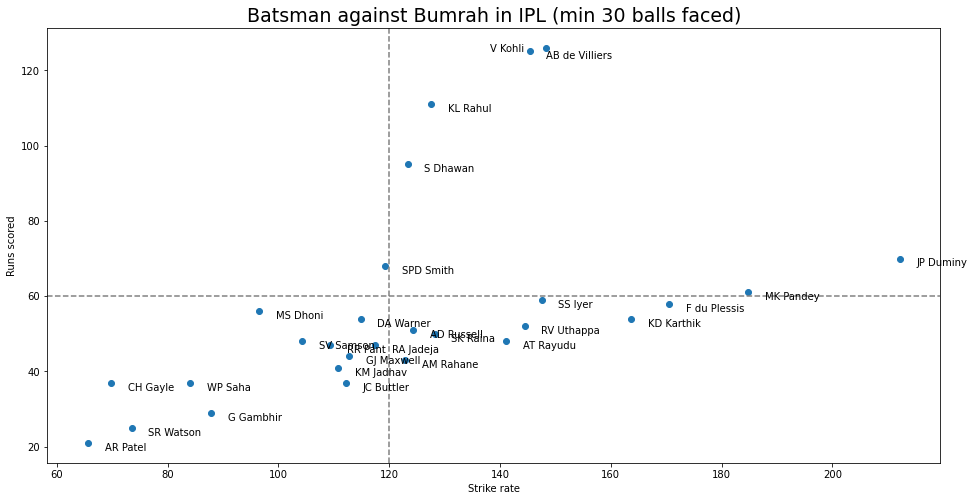

In [50]:
#scatter plot to see bumrah bowling to all
plt.figure(figsize=(16,8))
plt.scatter(bdf3.strike_rate,bdf3.runs_off_bat)
for i in range(len(bdf3)):
    #plt.text(x,y,text)
    if bdf3.striker[i] == 'V Kohli':
        #if striker is v kohli, push by 5 units left- -, + x value for left right, -,+ y value for up down
        plt.text(bdf3.strike_rate[i] -10, bdf3.runs_off_bat[i]-1,bdf3.striker[i])
    else:
        plt.text(bdf3.strike_rate[i]+3,bdf3.runs_off_bat[i]-2,bdf3.striker[i])
#adding lines to create regions(quadrants) to differentiate good and avg batsmen
#plt.axvline(xaxis value) for vertical, axhline for horizontal
plt.axvline(120, ls='--', color='grey')
plt.axhline(60,ls='--', color='grey')
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)',fontsize=19)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

<b><font size="4">So from the above plot it is evident that, against Bumrah,  Gayle, Watson struggle, middle ones are average, top ones are best</font></b>

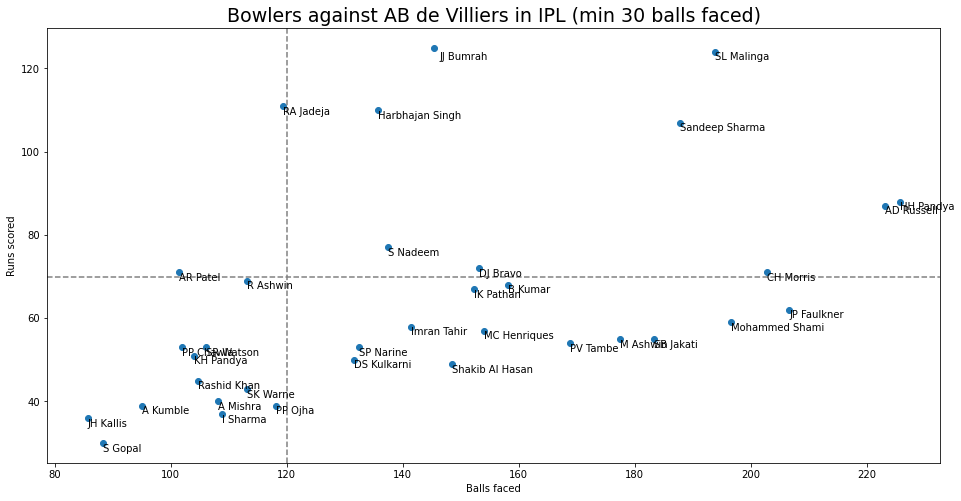

In [51]:
#scatter plot to see ab against all bowlers
plt.figure(figsize=(16,8))
plt.scatter(adf3.strike_rate,adf3.runs_off_bat)
for i in range(len(adf3)):
    #plt.text(x,y,text)
    if adf3.bowler[i] == 'JJ Bumrah':
        #if bowler is JJ Bumrah, push by 5 units left- -, + x value for left right, -,+ y value for up down
        plt.text(adf3.strike_rate[i] +1, adf3.runs_off_bat[i]-3,adf3.bowler[i])
    else:
        plt.text(adf3.strike_rate[i],adf3.runs_off_bat[i]-2,adf3.bowler[i])
#adding lines to create regions(quadrants) to differentiate good and avg batsmen
#plt.axvline(xaxis value) for vertical, axhline for horizontal
plt.axvline(120, ls='--', color='grey')
plt.axhline(70,ls='--', color='grey')
plt.title('Bowlers against AB de Villiers in IPL (min 30 balls faced)',fontsize=19)
plt.xlabel('Balls faced')
plt.ylabel('Runs scored')
plt.show()

<b><font size="4">It is evident from the vizzes that AB dominates Bumrah in IPL</font></b>